#### **@Author : Rupesh Kumar**

#### **Date : 24/10/2023**

<a id="1"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> 1. BUSINESS UNDERSTANDING</p>

##### *Duoro Hawk is a company that is pioneering the world's first large fleet of fully electric, self-piloting autonomous flying taxis. The company wants to deploy the first network of autonomous air taxis in the coming year. As part of the elite skyride DS ad-hock data science and engineering team, I will be piloting your fly to conduct a predictive study, by understanding the patterns from our previously conducted test simulation flights to predict the next destination. Leading to seamless end-to-end connectivity, so lets flytogether and begin our journey*

[![image](/Users/rupesh/Desktop/COD/Heetch/assets/Logo-large-pink.png)](/Users/rupesh/Desktop/COD/Heetch/assets/Logo-large-pink.png)




<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
**1. BUSINESS UNDERSTANDING**
    
**2. DATA UNDERSTANDING**
    
**3. DATA PREPARATION**
    
**4. MODELING**
    
**5. EVALUATION**
    
**6. THANK YOU 😊**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [4]:
df = pd.read_csv("/Users/rupesh/Desktop/COD/Heetch/data/mobile_events.csv")

In [5]:
df

,device_id,event_name,timestamp
0,1,pickup_shown,2020-10-02 15:36:02
1,1,dropoff_shown,2020-10-02 15:36:05
2,1,pickup_confirmed,2020-10-02 15:36:05
3,1,dropoff_address_typed,2020-10-02 15:36:06
4,1,dropoff_shown,2020-10-02 15:36:10
...,...,...,...
65529,865,pickup_shown,2020-10-03 09:26:51
65530,865,pickup_shown,2020-10-03 10:07:21
65531,865,pickup_shown,2020-10-03 10:41:08
65532,865,pickup_address_typed,2020-10-03 10:41:09


In [6]:
df.isnull().sum()

device_id     0
event_name    0
timestamp     0
dtype: int64

In [7]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day and create a new 'Day' column in 'YYYY-MM-DD' format
df['Day'] = df['timestamp'].dt.strftime('%Y-%m-%d')

# Extract the day of the week and the time of day
df['day_of_week'] = df['timestamp'].dt.day_name()

# Extract the time and create a new 'Time' column in 'h:m:s' format
df['Time'] = df['timestamp'].dt.strftime('%H:%M:%S')



In [8]:
df

,device_id,event_name,timestamp,Day,day_of_week,Time
0,1,pickup_shown,2020-10-02 15:36:02,2020-10-02,Friday,15:36:02
1,1,dropoff_shown,2020-10-02 15:36:05,2020-10-02,Friday,15:36:05
2,1,pickup_confirmed,2020-10-02 15:36:05,2020-10-02,Friday,15:36:05
3,1,dropoff_address_typed,2020-10-02 15:36:06,2020-10-02,Friday,15:36:06
4,1,dropoff_shown,2020-10-02 15:36:10,2020-10-02,Friday,15:36:10
...,...,...,...,...,...,...
65529,865,pickup_shown,2020-10-03 09:26:51,2020-10-03,Saturday,09:26:51
65530,865,pickup_shown,2020-10-03 10:07:21,2020-10-03,Saturday,10:07:21
65531,865,pickup_shown,2020-10-03 10:41:08,2020-10-03,Saturday,10:41:08
65532,865,pickup_address_typed,2020-10-03 10:41:09,2020-10-03,Saturday,10:41:09


In [9]:
import pandas as pd
import plotly.express as px
import numpy as np
import statsmodels.api as sm

# Define a custom order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count events by day of the week
day_of_week_counts = df['day_of_week'].value_counts()

# Sort the counts based on the custom day order
day_of_week_counts = day_of_week_counts.reindex(day_order)

# Create a bar plot to visualize the distribution
fig = px.bar(day_of_week_counts, x=day_of_week_counts.index, y=day_of_week_counts.values)
fig.update_layout(title='Event Distribution by Day of the Week', xaxis_title='Day of the Week', yaxis_title='Event Count')

# Add value and percentage annotations
total_events = day_of_week_counts.sum()
annotations = [f"{count} ({count/total_events*100:.2f}%)" for count in day_of_week_counts]

fig.update_traces(text=annotations, textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1500)

# Add a trend line
day_of_week_counts = day_of_week_counts.reset_index()
day_of_week_counts.columns = ['day_of_week', 'event_count']
day_of_week_counts['day_index'] = day_of_week_counts['day_of_week'].apply(lambda x: day_order.index(x))
X = sm.add_constant(day_of_week_counts['day_index'])
y = day_of_week_counts['event_count']

model = sm.OLS(y, X).fit()
trend_line = model.predict(X)

fig.add_scatter(x=day_order, y=trend_line, mode='lines', name='Trend Line')

fig.show()


In [10]:
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the custom order for event names
custom_order = [
    "pickup_shown",
    "pickup_address_typed",
    "pickup_confirmed",
    "dropoff_shown",
    "dropoff_address_typed",
    "dropoff_confirmed",
    "payments_shown",
    "payments_selected",
    "ride_order_tapped"
]

# Example: Histogram of event counts using Plotly with custom order and larger size
fig = px.histogram(df, x='event_name', title='Event Name Distribution')

# Calculate event counts and percentages
event_counts = df['event_name'].value_counts()
total_count = event_counts.sum()
event_percentages = (event_counts / total_count) * 100

# Create custom labels for annotations
annotations = [f"{count} ({percent:.2f}%)" for count, percent in zip(event_counts, event_percentages)]

# Add annotations on top of the bars
fig.update_traces(text=annotations, textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Set the custom order for the x-axis categories
fig.update_xaxes(title_text='Event Name', categoryorder='array', categoryarray=custom_order)
fig.update_yaxes(title_text='Count')

# Add a trend line
event_counts_df = pd.DataFrame({'event_name': custom_order, 'event_count': event_counts})
event_counts_df['event_index'] = event_counts_df['event_name'].apply(lambda x: custom_order.index(x))
X = sm.add_constant(event_counts_df['event_index'])
y = event_counts_df['event_count']

model = sm.OLS(y, X).fit()
trend_line = model.predict(X)

fig.add_scatter(x=custom_order, y=trend_line, mode='lines', name='Trend Line')

fig.update_layout(height=600, width=1500) 

fig.show()


In [11]:
import pandas as pd
import plotly.graph_objs as go

# Assuming you have loaded your data into a DataFrame named 'df'
funnel_stages = {
    "pickup_shown": df[df['event_name'] == 'pickup_shown']['device_id'].nunique(),
    "pickup_address_typed": df[df['event_name'] == 'pickup_address_typed']['device_id'].nunique(),
    "pickup_confirmed": df[df['event_name'] == 'pickup_confirmed']['device_id'].nunique(),
    "dropoff_shown": df[df['event_name'] == 'dropoff_shown']['device_id'].nunique(),
    "dropoff_address_typed": df[df['event_name'] == 'dropoff_address_typed']['device_id'].nunique(),
    "dropoff_confirmed": df[df['event_name'] == 'dropoff_confirmed']['device_id'].nunique(),
    "payments_shown": df[df['event_name'] == 'payments_shown']['device_id'].nunique(),
    "payments_selected": df[df['event_name'] == 'payments_selected']['device_id'].nunique(),
    "ride_order_tapped": df[df['event_name'] == 'ride_order_tapped']['device_id'].nunique()
}

# Calculate the percentages relative to the initial stage
initial_stage_count = funnel_stages["pickup_shown"]
percentage = {stage: (count / initial_stage_count) * 100 for stage, count in funnel_stages.items()}

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=list(funnel_stages.keys()),
    x=list(funnel_stages.values()),
    textinfo="value+percent initial",
    text=list(funnel_stages.values()),
    opacity=0.7,
    marker={"color": ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta']}
))

fig.update_layout(
    title="Preorder Funnel",
    xaxis_title="Number of Sessions",
    yaxis_title="Funnel Stages",
)
fig.update_layout(height=600, width=1500)

fig.show()


In [12]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define your funnel stages
funnel_stages = {
    "pickup_shown": "pickup_shown",
    "pickup_address_typed": "pickup_address_typed",
    "pickup_confirmed": "pickup_confirmed",
    "dropoff_shown": "dropoff_shown",
    "dropoff_address_typed": "dropoff_address_typed",
    "dropoff_confirmed": "dropoff_confirmed",
    "payments_shown": "payments_shown",
    "payments_selected": "payments_selected",
    "ride_order_tapped": "ride_order_tapped"
}

# Define the date range
start_date = pd.Timestamp('2020-10-01')
end_date = pd.Timestamp('2020-10-07')

# Filter the data for the specified date range
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Create a pivot table to count events for each stage and hour of the day
pivot_df = pd.pivot_table(filtered_df, index=filtered_df['timestamp'].dt.hour, columns=filtered_df['event_name'], values='device_id', aggfunc='nunique', fill_value=0)

# Calculate the total devices for each hour of the day
pivot_df['total_devices'] = pivot_df[funnel_stages.values()].sum(axis=1)

# Calculate the percentages for each stage in each hour of the day
for stage in funnel_stages:
    pivot_df[f'{stage}_percentage'] = (pivot_df[stage] / pivot_df['total_devices']) * 100

# Create a granular funnel chart based on the hour of the day
fig = px.line(pivot_df, x=pivot_df.index, y=[f'{stage}_percentage' for stage in funnel_stages.keys()], title="Hourly Funnel (2020-10-01 to 2020-10-07)")

# Create a summary report
summary_report = """
**Funnel Analysis Summary: Hourly Funnel (2020-10-01 to 2020-10-07)**

- Analysis Date Range: 2020-10-01 to 2020-10-07

**Key Findings:**
- The funnel analysis is based on the hourly distribution of user interactions during the specified date range.

**Hourly Funnel Chart:**

"""

# Save the plot as an image
fig.write_image("hourly_funnel_chart.png")

# Add the image path to the summary report
summary_report += "![Hourly Funnel Chart](hourly_funnel_chart.png)\n"

# You can add more findings and insights to the report as needed

# Save the report to a file
with open("funnel_analysis_summary.md", "w") as report_file:
    report_file.write(summary_report)

# Display the summary report
print(summary_report)

# Show the funnel chart
fig.show()



**Funnel Analysis Summary: Hourly Funnel (2020-10-01 to 2020-10-07)**

- Analysis Date Range: 2020-10-01 to 2020-10-07

**Key Findings:**
- The funnel analysis is based on the hourly distribution of user interactions during the specified date range.

**Hourly Funnel Chart:**

![Hourly Funnel Chart](hourly_funnel_chart.png)



In [13]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define your funnel stages
funnel_stages = {
    "pickup_shown": "pickup_shown",
    "pickup_address_typed": "pickup_address_typed",
    "pickup_confirmed": "pickup_confirmed",
    "dropoff_shown": "dropoff_shown",
    "dropoff_address_typed": "dropoff_address_typed",
    "dropoff_confirmed": "dropoff_confirmed",
    "payments_shown": "payments_shown",
    "payments_selected": "payments_selected",
    "ride_order_tapped": "ride_order_tapped"
}

# Define the date range
start_date = pd.Timestamp('2020-10-01')
end_date = pd.Timestamp('2020-10-07')

# Filter the data for the specified date range
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Create a pivot table to count events for each stage and minute of the day
pivot_df = pd.pivot_table(filtered_df, index=filtered_df['timestamp'].dt.strftime('%H:%M'), columns=filtered_df['event_name'], values='device_id', aggfunc='nunique', fill_value=0)

# Calculate the total devices for each minute of the day
pivot_df['total_devices'] = pivot_df[funnel_stages.values()].sum(axis=1)

# Calculate the percentages for each stage in each minute of the day
for stage in funnel_stages:
    pivot_df[f'{stage}_percentage'] = (pivot_df[stage] / pivot_df['total_devices']) * 100

# Apply a smoothing technique (e.g., 5-minute moving average) to reduce noise
pivot_df_smoothed = pivot_df.rolling(window=5).mean()

# Create an interactive plot with smoothed data
fig = px.line(pivot_df_smoothed, x=pivot_df_smoothed.index, y=[f'{stage}_percentage' for stage in funnel_stages.keys()], title="Minute-Level Funnel (2020-10-01 to 2020-10-07)")

# Customize the plot appearance
fig.update_layout(
    xaxis_title="Time of Day",
    yaxis_title="Percentage",
    showlegend=True,  # Display legend for stages
    legend_title="Funnel Stages",
    xaxis=dict(tickmode='auto', nticks=10),  # Customize x-axis ticks for readability
    yaxis=dict(range=[0, 100]),  # Set a fixed y-axis range
)

# Add trendlines for each stage
for stage in funnel_stages:
    fig.add_trace(go.Scatter(x=pivot_df_smoothed.index, y=pivot_df_smoothed[f'{stage}_percentage'], mode='lines', name=f'{stage}_trendline'))

# Show the plot
fig.show()


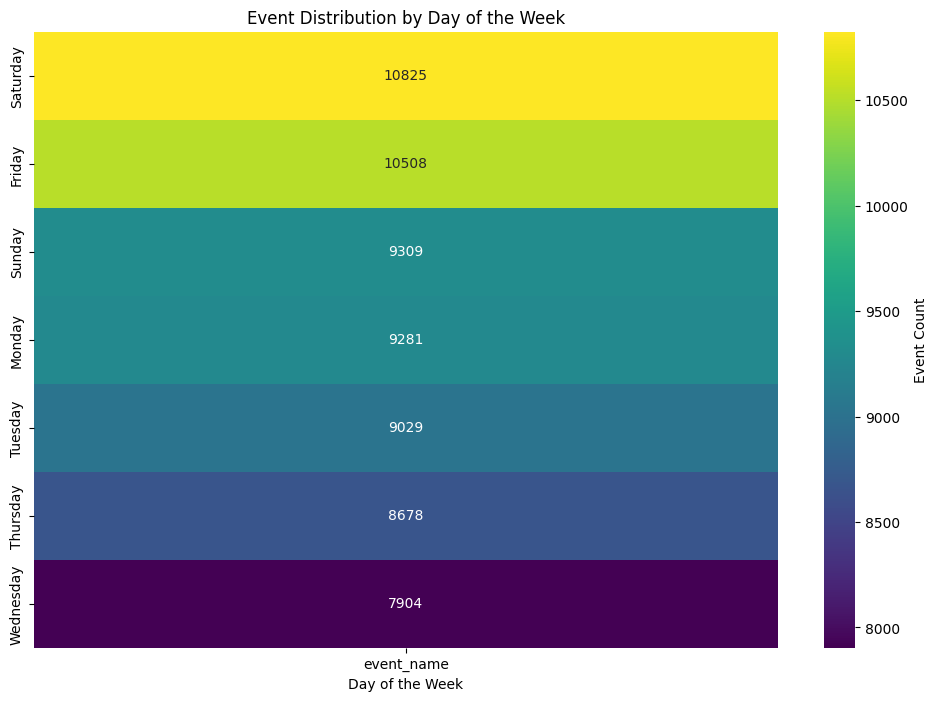

In [14]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day of the week
df['day_of_week'] = df['timestamp'].dt.day_name()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='event_name', index='day_of_week', aggfunc='count', fill_value=0)

# Reorder the days of the week in descending order of event counts
day_order = pivot_table.sum(axis=1).sort_values(ascending=False).index
pivot_table = pivot_table.reindex(day_order)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Event Count'})
plt.title('Event Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('')
plt.show()


In [15]:
df

,device_id,event_name,timestamp,Day,day_of_week,Time
0,1,pickup_shown,2020-10-02 15:36:02,2020-10-02,Friday,15:36:02
1,1,dropoff_shown,2020-10-02 15:36:05,2020-10-02,Friday,15:36:05
2,1,pickup_confirmed,2020-10-02 15:36:05,2020-10-02,Friday,15:36:05
3,1,dropoff_address_typed,2020-10-02 15:36:06,2020-10-02,Friday,15:36:06
4,1,dropoff_shown,2020-10-02 15:36:10,2020-10-02,Friday,15:36:10
...,...,...,...,...,...,...
65529,865,pickup_shown,2020-10-03 09:26:51,2020-10-03,Saturday,09:26:51
65530,865,pickup_shown,2020-10-03 10:07:21,2020-10-03,Saturday,10:07:21
65531,865,pickup_shown,2020-10-03 10:41:08,2020-10-03,Saturday,10:41:08
65532,865,pickup_address_typed,2020-10-03 10:41:09,2020-10-03,Saturday,10:41:09


In [16]:
df.drop(['timestamp'], axis=1)

,device_id,event_name,Day,day_of_week,Time
0,1,pickup_shown,2020-10-02,Friday,15:36:02
1,1,dropoff_shown,2020-10-02,Friday,15:36:05
2,1,pickup_confirmed,2020-10-02,Friday,15:36:05
3,1,dropoff_address_typed,2020-10-02,Friday,15:36:06
4,1,dropoff_shown,2020-10-02,Friday,15:36:10
...,...,...,...,...,...
65529,865,pickup_shown,2020-10-03,Saturday,09:26:51
65530,865,pickup_shown,2020-10-03,Saturday,10:07:21
65531,865,pickup_shown,2020-10-03,Saturday,10:41:08
65532,865,pickup_address_typed,2020-10-03,Saturday,10:41:09


In [17]:
# Extract hour and day of the week from the 'Time' column
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
df['Day_of_Week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Create a pivot table for user activity by hour and day of the week
heatmap_data = df.pivot_table(index='Hour', columns='Day_of_Week', values='device_id', aggfunc='count', fill_value=0)

# Create the heatmap using Plotly
fig = px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, color_continuous_scale='Viridis')

# Customize the heatmap appearance
fig.update_layout(
    title='User Activity Heatmap by Hour and Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Hour of the Day',
    xaxis_nticks=len(heatmap_data.columns),
    yaxis_nticks=len(heatmap_data.index),
)

# Show the heatmap
fig.show()